In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.unpack_archive('/content/drive/MyDrive/캡스톤/detection/crop_cars.zip', '/content/drive/MyDrive/캡스톤/detection/data', 'zip')

In [ ]:
import numpy as np

In [ ]:
def make_noise(std, img):
    height, width, chnnel = img.shape
    img_noise = np.zeros((height, width, chnnel), dtype=np.float)
    for i in range(height):
        for a in range(width):
            make_noise = np.random.normal()  # 랜덤함수를 이용하여 노이즈 적용
            set_noise = std * make_noise
            img_noise[i][a] = img[i][a] + set_noise
    return img_noise

In [ ]:
import os
path = '/content/drive/MyDrive/캡스톤/detection/data'
data_list = os.listdir(path)
data_list[:5]
len(data_list)

1000

In [ ]:
import cv2

In [ ]:
for data in data_list:
    img = cv2.imread('/content/drive/MyDrive/캡스톤/detection/data/'+data)
#     print(img.shape)
    
    std = 40
    img_noise = make_noise(std, img)
    
#     cv2.imshow('test', img_noise)
    cv2.imwrite('/content/drive/MyDrive/캡스톤/detection/std_40/'+data, img_noise)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


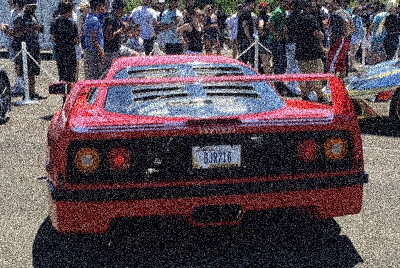

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/캡스톤/images/Cars13.png')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# height, width = gray.shape

std = 30
img_noise = make_noise(std, img)

cv2_imshow(img_noise)

In [ ]:
import cv2
import numpy as np

In [ ]:
net = cv2.dnn.readNet("/content/drive/MyDrive/캡스톤/detection/yolov3.weights", "/content/drive/MyDrive/캡스톤/detection/yolov3.cfg")
classes = []
with open("/content/drive/MyDrive/캡스톤/detection/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
img = cv2.imread("/content/drive/MyDrive/캡스톤/detection/헤드라이트+바퀴/00025.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape

---

In [ ]:
import os

path = "/content/drive/MyDrive/캡스톤/detection/그릴"
img_list = os.listdir(path)
img_list

['00053.jpg',
 '00031.jpg',
 '00029.jpg',
 '00025.jpg',
 '00023.jpg',
 '00003.jpg',
 '00006.jpg',
 '00020.jpg',
 '00015.jpg',
 '00122.jpg',
 '00036.jpg']

In [ ]:
origin = []
std_170 = []

In [ ]:
import os

In [ ]:
path = "/content/drive/MyDrive/캡스톤/detection/data"
img_list = os.listdir(path)
# save_file = "/content/drive/MyDrive/캡스톤/detection/그릴/결과"

for ii in img_list:
    img = cv2.imread(path+'/'+ii)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(np.float32(img), 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    # 정보를 화면에 표시
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # 좌표
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
            cv2.putText(img, f'{confidences[i]:.3f}', (x, y + 80), font, 2, color, 3)
            # print(f'{ii}가 {label}일 확률 {confidences[i]:.3f}%')
    # cv2_imshow(img)
    # cv2.imwrite(save_file+'/'+ii, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # print('✨'*20)
    # print()
    origin.append(label)

In [ ]:
origin

In [ ]:
std_170

In [ ]:
print("prediction accuracy: {:.2f}".format(np.mean(origin == std_170)))

prediction accuracy: 0.00


In [ ]:
import pandas as pd

df = pd.DataFrame({'origin':origin, '170':std_170})
df

,origin,170
0,bus,keyboard
1,truck,cake
2,car,car
3,car,car
4,car,car
...,...,...
995,car,keyboard
996,car,keyboard
997,car,keyboard
998,car,suitcase


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(origin, std_170))

               precision    recall  f1-score   support

     broccoli       0.00      0.00      0.00         0
          bus       0.00      0.00      0.00        21
         cake       0.00      0.00      0.00         0
          car       0.68      0.20      0.30       664
          cat       0.00      0.00      0.00         2
        clock       0.00      0.00      0.00         1
     keyboard       0.00      0.00      0.00         0
         oven       0.00      0.00      0.00         1
parking meter       0.00      0.00      0.00         4
       person       0.00      0.00      0.00        40
        pizza       0.00      0.00      0.00         0
       remote       0.00      0.00      0.00         2
     suitcase       0.00      0.00      0.00         0
          tie       0.00      0.00      0.00         0
traffic light       0.00      0.00      0.00         1
        train       0.00      0.00      0.00         6
        truck       0.19      0.01      0.02       258

     acc

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
df.loc[df['origin']!=df['170']]

,origin,170
0,bus,keyboard
1,truck,cake
5,truck,car
8,car,pizza
9,car,cake
...,...,...
995,car,keyboard
996,car,keyboard
997,car,keyboard
998,car,suitcase


In [ ]:
df.loc[df['origin']==df['170']]

,origin,170
2,car,car
3,car,car
4,car,car
6,car,car
7,car,car
...,...,...
954,car,car
979,car,car
981,car,car
984,car,car


In [ ]:
img = img_noise
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
# print(height, width, channels)

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

# 정보를 화면에 표시
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # 좌표
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
        cv2.putText(img, f'{confidences[i]:.3f}', (x, y + 80), font, 2, color, 3)
        print(f'{ii}가 {label}일 확률 {confidences[i]:.3f}%')
cv2_imshow(img)
cv2.imwrite(save_file+'/'+ii, img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print('✨'*20)
print()

222 367 3


error: ignored



---



In [ ]:
import torch
print(torch.__version__)

1.12.1+cu113


In [ ]:
# YOLOv5 종속 항목 설치
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 1.6 MB 5.0 MB/s 


In [ ]:
# 모델
model = torch.hub.load('ultralytics/yolov5', 'yolov5m', pretrained=True)

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
INFO:yolov5:YOLOv5 🚀 2022-11-1 Python-3.7.15 torch-1.12.1+cu113 CPU

YOLOv5 🚀 2022-11-1 Python-3.7.15 torch-1.12.1+cu113 CPU

INFO:yolov5:Downloading https://git

  0%|          | 0.00/40.8M [00:00<?, ?B/s]

INFO:yolov5:

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
YOLOv5m summary: 290 layers, 21172173 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


In [ ]:
import os
import pandas as pd

In [ ]:
# origin_res.to_csv('/content/drive/MyDrive/캡스톤/detection/origin.csv', index=False)
origin_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/origin.csv')
origin_res

In [ ]:
path = '/content/drive/MyDrive/캡스톤/detection/std_10'
data_list = os.listdir(path)
std10_res = pd.DataFrame(columns={'xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name', 'img_name'})
for img_ in data_list:
    img = [path+'/'+img_]
    results = model(img)
    std10 = results.pandas().xyxy[0].head(1)
    std10['img_name'] = img[0][-9:]
    std10_res = pd.concat([std10_res, std10], axis=0)

In [ ]:
std10_res

In [ ]:
# std10_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std10.csv', index=False)
std10_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std10.csv')
std10_res

In [ ]:
# std20_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std20.csv', index=False)
std20_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std20.csv')
std20_res

In [ ]:
# std30_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std30.csv', index=False)
std30_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std30.csv')
std30_res

In [ ]:
# std40_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std40.csv', index=False)
std40_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std40.csv')
std40_res

In [ ]:
# std50_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std50.csv', index=False)
std50_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std50.csv')
std50_res

In [ ]:
# std60_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std60.csv', index=False)
std60_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std60.csv')
std60_res

In [ ]:
# std70_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std70.csv', index=False)
std70_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std70.csv')
std70_res

In [ ]:
std80_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std80.csv')
std80_res

In [ ]:
std90_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std90.csv')
std90_res

In [ ]:
std100_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std100.csv')
std100_res

In [ ]:
path = '/content/drive/MyDrive/캡스톤/detection/std_110'
data_list = os.listdir(path)
std110_res = pd.DataFrame(columns={'xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name', 'img_name'})
for img_ in data_list:
    img = [path+'/'+img_]
    results = model(img)
    std110 = results.pandas().xyxy[0].head(1)  # 예측 (pandas)
    std110['img_name'] = img[0][-9:]
    std110_res = pd.concat([std110_res, std110], axis=0)
print(std110_res)
std110_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std110.csv', index=False)

    confidence        xmin        xmax        ymax          name class  \
0     0.806918  382.792480  425.950867  260.014343        person     0   
0     0.312192  593.042480  617.979736  136.045944  fire hydrant    10   
0     0.377725    1.755200  573.084351  182.511673           car     2   
0     0.284986    0.000000  671.200745  490.717529         truck     7   
0     0.358605  359.748474  409.242218  270.355865  fire hydrant    10   
..         ...         ...         ...         ...           ...   ...   
0     0.720474  521.408264  560.129395  102.986389        person     0   
0     0.308380    0.797265  575.000000  197.448105         truck     7   
0     0.322741    2.570091  626.857544  204.212326           car     2   
0     0.293715    0.000000  367.022827  109.785309           car     2   
0     0.370094   89.552597  160.475937   81.437988           tie    27   

     img_name        ymin  
0   00482.jpg  149.437531  
0   00485.jpg   75.004089  
0   00505.jpg    0.693171  

In [ ]:
path = '/content/drive/MyDrive/캡스톤/detection/std_120'
data_list = os.listdir(path)
std120_res = pd.DataFrame(columns={'xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name', 'img_name'})
for img_ in data_list:
    img = [path+'/'+img_]
    results = model(img)
    std120 = results.pandas().xyxy[0].head(1)  # 예측 (pandas)
    std120['img_name'] = img[0][-9:]
    std120_res = pd.concat([std120_res, std120], axis=0)
print(std120_res)
std120_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std120.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


    confidence        xmin         xmax        ymax          name class  \
0     0.334942    5.609012   563.231384  242.855667           car     2   
0     0.271814    3.171612  1026.000000  381.310516         truck     7   
0     0.441610    4.010615   143.810440  145.410019  fire hydrant    10   
0     0.322853  544.797485   658.013489  397.833679      suitcase    28   
0     0.329051    1.524892   401.675446  197.110245           car     2   
..         ...         ...          ...         ...           ...   ...   
0     0.534949    1.935739   620.006165  289.060974         truck     7   
0     0.294033   54.635075   207.911285  188.125198      suitcase    28   
0     0.328764    1.009888   209.394470  291.594330       giraffe    23   
0     0.258139  460.506073   476.377380   73.094353        person     0   
0     0.438433    4.421793   627.350891  205.344620           car     2   

     img_name        ymin  
0   00465.jpg    3.002409  
0   00472.jpg   23.765724  
0   00505.jpg  

In [ ]:
path = '/content/drive/MyDrive/캡스톤/detection/std_130'
data_list = os.listdir(path)
std130_res = pd.DataFrame(columns={'xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name', 'img_name'})
for img_ in data_list:
    img = [path+'/'+img_]
    results = model(img)
    std130 = results.pandas().xyxy[0].head(1)  # 예측 (pandas)
    std130['img_name'] = img[0][-9:]
    std130_res = pd.concat([std130_res, std130], axis=0)
print(std130_res)
std130_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std130.csv', index=False)

    confidence        xmin         xmax        ymax      name class  \
0     0.375495    4.081409   562.592041  241.937256       car     2   
0     0.668882  174.240265   261.853577  245.285889    person     0   
0     0.415752  239.672226   397.862000  230.071823  umbrella    25   
0     0.293039  357.574768   422.665131  266.367889    person     0   
0     0.516541  548.509399   658.285339  396.536102  suitcase    28   
..         ...         ...          ...         ...       ...   ...   
0     0.555014    1.722304   236.105209  138.138870       car     2   
0     0.855998  754.828674  1011.335815   80.194458       car     2   
0     0.422833  577.065002   608.083862   81.512833    person     0   
0     0.251368    1.762016   627.354736  201.844589       car     2   
0     0.328182    7.738764   200.988113  142.265274       car     2   

     img_name        ymin  
0   00465.jpg    3.155950  
0   00474.jpg   77.896812  
0   00494.jpg  159.476028  
0   00497.jpg   74.011414  
0   004

In [ ]:
path = '/content/drive/MyDrive/캡스톤/detection/std_140'
data_list = os.listdir(path)
std140_res = pd.DataFrame(columns={'xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name', 'img_name'})
for img_ in data_list:
    img = [path+'/'+img_]
    results = model(img)
    std140 = results.pandas().xyxy[0].head(1)  # 예측 (pandas)
    std140['img_name'] = img[0][-9:]
    std140_res = pd.concat([std140_res, std140], axis=0)
print(std140_res)
std140_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std140.csv', index=False)

    confidence         xmin         xmax         ymax      name class  \
0     0.751429   174.687561   260.929565   244.677048    person     0   
0     0.283641   544.181702   659.493408   395.477844  suitcase    28   
0     0.495964     1.320721    67.729736   440.145874    person     0   
0     0.369681   194.459412   257.286835   219.818436    person     0   
0     0.594024  1219.152466  1587.832031  1261.692993   giraffe    23   
..         ...          ...          ...          ...       ...   ...   
0     0.442194     0.000000   703.000000   209.132416     truck     7   
0     0.514068     0.043631    76.793655   154.161362       car     2   
0     0.374151     0.000000   469.134552   159.602356     truck     7   
0     0.521934   522.873962   562.969055   104.627716    person     0   
0     0.297370   134.791122   154.296631   178.349808    person     0   

     img_name        ymin  
0   00474.jpg   73.915855  
0   00496.jpg  272.000916  
0   00003.jpg  194.026535  
0   00006.j

In [ ]:
path = '/content/drive/MyDrive/캡스톤/detection/std_150'
data_list = os.listdir(path)
std150_res = pd.DataFrame(columns={'xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name', 'img_name'})
for img_ in data_list:
    img = [path+'/'+img_]
    results = model(img)
    std150 = results.pandas().xyxy[0].head(1)  # 예측 (pandas)
    std150['img_name'] = img[0][-9:]
    std150_res = pd.concat([std150_res, std150], axis=0)
print(std150_res)
std150_res.to_csv('/content/drive/MyDrive/캡스톤/detection/std150.csv', index=False)

In [ ]:
std150_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std150.csv')
std150_res

In [ ]:
std160_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std160.csv')
std160_res

In [ ]:
std170_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std170.csv')
std170_res

In [ ]:
std180_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std180.csv')
std180_res

In [ ]:
std190_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std190.csv')
std190_res

In [ ]:
std200_res = pd.read_csv('/content/drive/MyDrive/캡스톤/detection/std200.csv')
std200_res

In [ ]:
correct = []
correct.append(len(origin_res.loc[(origin_res['name']=='car') | (origin_res['name']=='truck') | (origin_res['name']=='bus')]))
correct.append(len(std10_res.loc[(std10_res['name']=='car') | (std10_res['name']=='truck') | (std10_res['name']=='bus')]))
correct.append(len(std20_res.loc[(std20_res['name']=='car') | (std20_res['name']=='truck') | (std20_res['name']=='bus')]))
correct.append(len(std30_res.loc[(std30_res['name']=='car') | (std30_res['name']=='truck') | (std30_res['name']=='bus')]))
correct.append(len(std40_res.loc[(std40_res['name']=='car') | (std40_res['name']=='truck') | (std40_res['name']=='bus')]))
correct.append(len(std50_res.loc[(std50_res['name']=='car') | (std50_res['name']=='truck') | (std50_res['name']=='bus')]))
correct.append(len(std60_res.loc[(std60_res['name']=='car') | (std60_res['name']=='truck') | (std60_res['name']=='bus')]))
correct.append(len(std70_res.loc[(std70_res['name']=='car') | (std70_res['name']=='truck') | (std70_res['name']=='bus')]))
correct.append(len(std80_res.loc[(std80_res['name']=='car') | (std80_res['name']=='truck') | (std80_res['name']=='bus')]))
correct.append(len(std90_res.loc[(std90_res['name']=='car') | (std90_res['name']=='truck') | (std90_res['name']=='bus')]))
correct.append(len(std100_res.loc[(std100_res['name']=='car') | (std100_res['name']=='truck') | (std100_res['name']=='bus')]))
correct.append(len(std110_res.loc[(std110_res['name']=='car') | (std110_res['name']=='truck') | (std110_res['name']=='bus')]))
correct.append(len(std120_res.loc[(std120_res['name']=='car') | (std120_res['name']=='truck') | (std120_res['name']=='bus')]))
correct.append(len(std130_res.loc[(std130_res['name']=='car') | (std130_res['name']=='truck') | (std130_res['name']=='bus')]))
correct.append(len(std140_res.loc[(std140_res['name']=='car') | (std140_res['name']=='truck') | (std140_res['name']=='bus')]))
correct.append(len(std150_res.loc[(std150_res['name']=='car') | (std150_res['name']=='truck') | (std150_res['name']=='bus')]))
correct.append(len(std160_res.loc[(std160_res['name']=='car') | (std160_res['name']=='truck') | (std160_res['name']=='bus')]))
correct.append(len(std170_res.loc[(std170_res['name']=='car') | (std170_res['name']=='truck') | (std170_res['name']=='bus')]))
correct.append(len(std180_res.loc[(std180_res['name']=='car') | (std180_res['name']=='truck') | (std180_res['name']=='bus')]))
correct.append(len(std190_res.loc[(std190_res['name']=='car') | (std190_res['name']=='truck') | (std190_res['name']=='bus')]))
correct.append(len(std200_res.loc[(std200_res['name']=='car') | (std200_res['name']=='truck') | (std200_res['name']=='bus')]))

In [ ]:
acc = []
for i in correct:
    acc.append(i/1000 * 100)
acc

[95.0,
 94.0,
 91.7,
 87.2,
 76.9,
 69.19999999999999,
 60.199999999999996,
 49.5,
 40.300000000000004,
 32.6,
 25.1,
 19.900000000000002,
 14.799999999999999,
 11.5,
 8.799999999999999,
 0.1,
 4.2,
 3.4000000000000004,
 2.0,
 2.1999999999999997,
 1.2]

In [ ]:
std = [s for s in range(0, 210, 10)]
std

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
std

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200]

In [ ]:
acc

[95.0,
 94.0,
 91.7,
 87.2,
 76.9,
 69.19999999999999,
 60.199999999999996,
 49.5,
 40.300000000000004,
 32.6,
 25.1,
 19.900000000000002,
 14.799999999999999,
 11.5,
 8.799999999999999,
 0.1,
 4.2,
 3.4000000000000004,
 2.0,
 2.1999999999999997,
 1.2]

In [ ]:
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20, fontweight='bold')  # 범례 폰트 크기
plt.rc('figure', titlesize=50) # figure title 폰트 크기

KeyError: ignored

In [ ]:
fontdict={
     'fontsize': 25,
     'fontweight': 'heavy'}  # 'heavy', 'light', 'ultrabold', 'ultralight'

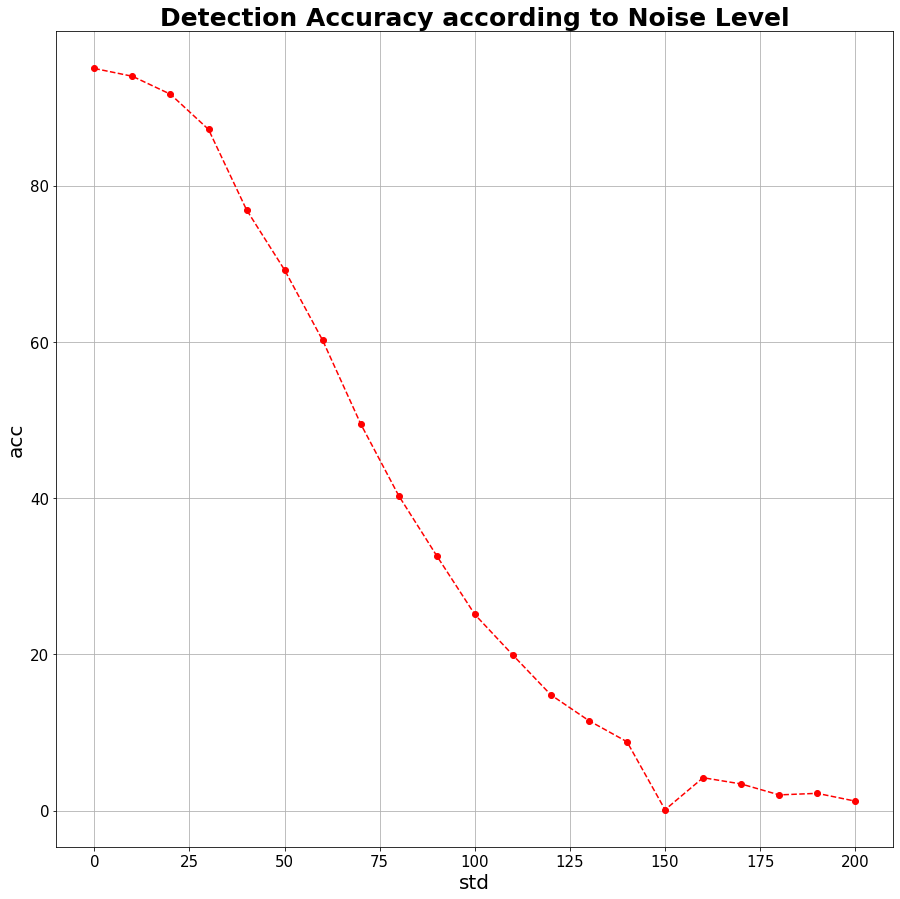

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
plt.figure(figsize=(15, 15)) 
plt.plot(std, acc, 'ro--')
plt.title('Detection Accuracy according to Noise Level', fontdict)
plt.xlabel('std')
plt.ylabel('acc')
plt.grid()
plt.show()
plt.savefig('/content/drive/MyDrive/캡스톤/detection/res.jpg')

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (22.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
